In [1]:
import numpy as np
import cv2
import time
import matplotlib.pyplot as plt
import glob
import mediapipe as mp

In [4]:
mpHands = mp.solutions.hands # Load mediapipe hands module
hands = mpHands.Hands( # Initialize hands model
    max_num_hands=2,
    model_complexity=1,
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5,
    static_image_mode=False)

def findHands(img):
    imgRGB = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) # Transform to RGB
    results = hands.process(imgRGB) # Feeding image through Hands model
    
    return results # Returning values from model prediction

In [5]:
mpFace = mp.solutions.face_mesh # Load mediapipe face module

faces = mpFace.FaceMesh( # Initialize Face model
    
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5,
    static_image_mode=False)

def findFace(img):
    imgRGB = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) # Transform image to RGB
    results = faces.process(imgRGB) # Feeding image through Face model
    
    return results # Returning values from model prediction

In [14]:
mpDrawHands = mp.solutions.drawing_utils # Initializing drawing object for hands
mpDrawFace = mp.solutions.drawing_utils # Initializing drawing object for Face
mp_drawing_styles =mp.solutions.drawing_styles
mp_drawing_face = mpDrawFace.DrawingSpec(color=(0,0,200),thickness=0,circle_radius=1) #Initializing drawing specifications for face
mp_drawing_hands = mpDrawHands.DrawingSpec(color=(255,0,0),thickness=0,circle_radius=1) #Initializing drawing specifications for hand

def drawLandmarks(img,resultsFace,resultsHands):
    if resultsFace.multi_face_landmarks:
        for face_landmarks in resultsFace.multi_face_landmarks:   
            mpDrawFace.draw_landmarks( # Draw face lendmark
              image=img,
              landmark_list=face_landmarks,
              connections=mpFace.FACEMESH_CONTOURS,
                landmark_drawing_spec=mp_drawing_face,
              
              connection_drawing_spec=mp_drawing_styles.get_default_face_mesh_tesselation_style()
              )
            
    if resultsHands.multi_hand_landmarks:
        for handlms in resultsHands.multi_hand_landmarks:   
            mpDrawHands.draw_landmarks(image=img, # Draw hand landmarks
                                       landmark_list=handlms,
                                       connections=mpHands.HAND_CONNECTIONS,
                                      landmark_drawing_spec=mp_drawing_hands)
    return img

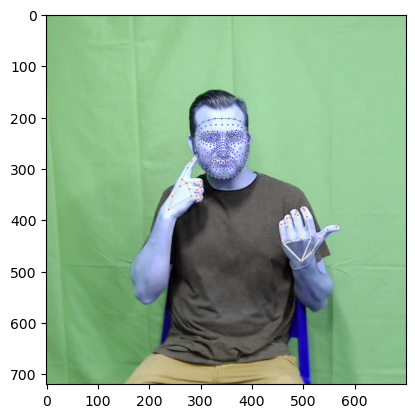

In [10]:
#test for 1 frame
for i in range(0,1):
    img=frameovi[199+i]
    resultsFace=findFace(img)
    resultsHands=findHands(img)
    
    plt.imshow(drawLandmarks(img,resultsFace,resultsHands))
    plt.show()
  # cv2.imshow("a",imga)
    time.sleep(0.2)

In [112]:
cap = cv2.VideoCapture('ASLens-test1/ASLens - test data 1/FZLxEwsoc1c-8-rgb_front.mp4')
i=0
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter('output-hands-woman6.mp4',fourcc, 15,(700,720))
use_frame=True
frameovi=[]  
#
while(True):
    ret, frame = cap.read() #reading frames
    if ret: #if frame exist ret=True, otherwise False
        if use_frame: # this means we will skip every other frame
            frame=frame[:, 300:1000,:] #cropping image, retainig all 3 rgb channels
            frameovi.append(frame)
            
            
            resultsFace=findFace(frame) #using function defined above to detect facial landmarks in a frame (findFace)
            resultsHands=findHands(frame) #using function defined above to detect hand landmarks in a frame (findHnds)
    
            
            out.write(drawLandmarks(frame,resultsFace,resultsHands)) #drawing landmarks on frames by using function defined above (drawLadmarks)
            i+=1

            use_frame=False
        else:
            use_frame=True
    else:
        break
out.release() #close writing stream

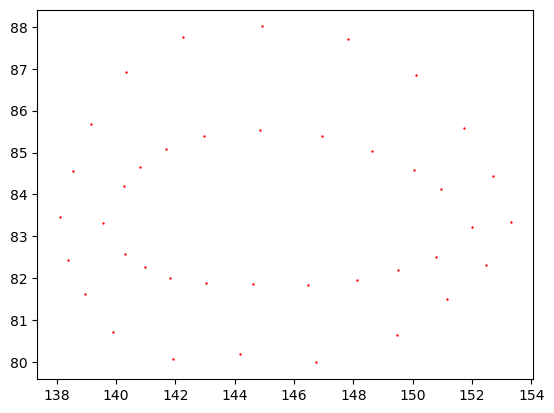

In [300]:
img=frameovi[180]
resultsFace=findFace(img) #using function defined above to detect facial landmarks in a frame (findFace)
#resultsHands=findHands(img) 
#plt.imshow(img)
landmarkovi=resultsFace.multi_face_landmarks[0]
for i in  lips[:]:
    plt.scatter(landmarkovi.landmark[i].x*300,landmarkovi.landmark[i].y*200,color="red",s=0.5)
#resultsFace.multi_face_landmarks[0].landmark[0:17]
plt.show()

In [130]:
img.shape

(720, 700, 3)

In [302]:
lips=[(270, 409), (317, 402), (81, 82), (91, 181), (37, 0), (84, 17), (269, 270), (321, 375), (318, 324), (312, 311), (415, 308), (17, 314), (61, 146), (78, 95), (0, 267), (82, 13), (314, 405), (178, 87), (267, 269), (61, 185), (14, 317), (88, 178), (185, 40), (405, 321), (13, 312), (324, 308), (409, 291), (146, 91), (87, 14), (78, 191), (95, 88), (311, 310), (39, 37), (40, 39), (402, 318), (191, 80), (80, 81), (310, 415), (181, 84), (375, 291)]

In [262]:
data = []
for l in lips:
    for k in l:
        data.append(k)

lips = set(data)
lips = list(lips)

In [264]:
print(len(lips))

40


In [252]:
lips.sort
lips

[0,
 13,
 14,
 17,
 37,
 39,
 40,
 61,
 78,
 80,
 81,
 82,
 84,
 87,
 88,
 91,
 95,
 146,
 178,
 181,
 185,
 191,
 267,
 269,
 270,
 291,
 308,
 310,
 311,
 312,
 314,
 317,
 318,
 321,
 324,
 375,
 402,
 405,
 409,
 415]